In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats, LoadEntropy

In [2]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.legend_handler import HandlerTuple
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(18,16,14,14)

In [25]:
x_cfl2, entropy_cfl2 = LoadEntropy(32, 64, 5e6, 1e5, 1j, 0.048, 'circle', 'cfl0pf')
x_ff, entropy_ff = LoadEntropy(32, 64, 5e6, 1e5, 1j, 0.051, 'circle', 'free_fermions')

#popt_cfl2, pcov_cfl2 = np.polyfit(np.log(x_cfl2), entropy_cfl2[:,6]/x_cfl2, deg=1, cov=True, w=1/entropy_cfl2[:,7])
#popt_sign_cfl2, pcov_sign_cfl2 = np.polyfit(np.log(x_cfl2), entropy_cfl2[:,4]/x_cfl2, deg=1, cov=True, w=1/entropy_cfl2[:,5])

x_fit = np.linspace(0,5,2)
#y_fit_cfl2 = x_fit*popt_cfl2[0] + popt_cfl2[1]
#y_fit_sign_cfl2 = x_fit*popt_sign_cfl2[0] + popt_sign_cfl2[1]

popt_ff, pcov_ff = np.polyfit(np.log(x_ff), entropy_ff[:,6]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,7])
popt_sign_ff, pcov_sign_ff = np.polyfit(np.log(x_ff), entropy_ff[:,4]/x_ff, deg=1, cov=True, w=1/entropy_ff[:,5])

x_fit = np.linspace(0,5,2)
y_fit_ff = x_fit*popt_ff[0] + popt_ff[1]
y_fit_sign_ff = x_fit*popt_sign_ff[0] + popt_sign_ff[1]

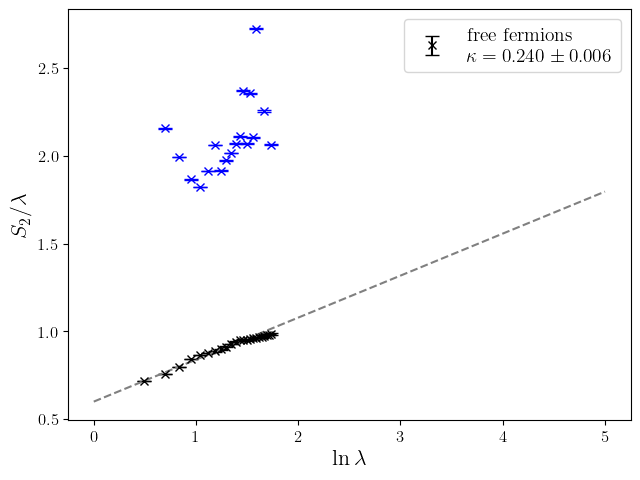

In [29]:
Ne = 37
update_mpl_param(16,14,12,12)

plt.errorbar(np.log(x_ff), (entropy_ff[:,6]/x_ff), entropy_ff[:,7], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\\kappa = {popt_ff[0]:.3f} \pm {np.sqrt(pcov_ff[0,0]):.3f}$')
plt.errorbar(np.log(x_cfl2[1:]), (entropy_cfl2[1:,6]/x_cfl2[1:]), entropy_ff[1:,7], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
)#label=f'$\\nu = 1/2$ CFL \n $\\kappa = {popt_cfl2[0]:.3f} \pm {np.sqrt(pcov_cfl2[0,0]):.3f}$')

#plt.errorbar(np.log(x_ff22), (S_ff22/x_ff22), err_ff22, marker='x',
#             color='brown', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
#             label=f'free fermions \n $\\kappa = {popt_ff22[0]:.3f} \pm {np.sqrt(pcov_ff22[0,0]):.3f}$')

plt.plot(x_fit, y_fit_ff, '--', c='gray')
#plt.plot(x_fit, y_fit_cfl22, '--', c='gray')
#plt.plot(x_fit, y_fit_cfl3, '--', c='gray')
#plt.plot(x_fit, y_fit_cfl1, '--', c='gray')

plt.legend(ncol=2)
plt.ylabel('$S_{2}/\\lambda$')
plt.xlabel('$\ln \\lambda$')
#plt.xlim(0.5,1.9)
#plt.ylim(0.6,2.7)
#plt.title('$S_{2, \mathrm{tot}}$'+f', $N={Ne}$ ')
plt.tight_layout(pad=0.5)
#plt.savefig(f'entropy total all fillings.pdf')  